<h1>Optimización y Pronóstico en Estrategias de Inversión Macro Cuantitativa mediante Análisis de Series Temporales</h1>

Por Víctor González

<h1>Introducción</h1>
Las estrategias de inversión macro cuantitativa se centran en el análisis de datos macroeconómicos y financieros a gran escala para tomar decisiones de inversión. Estas estrategias utilizan modelos matemáticos y algoritmos para identificar patrones y oportunidades en los mercados financieros. Su enfoque se basa en factores macroeconómicos, como tasas de interés, inflación, políticas gubernamentales y otros indicadores económicos, con el objetivo de pronosticar movimientos en los mercados y tomar decisiones de inversión informadas. Estas estrategias son parte de la inversión cuantitativa y buscan aprovechar las tendencias y desequilibrios en los mercados para obtener rendimientos positivos.

Históricamente, la información cuantamental ha estado en formatos demasiado desordenados para operar. Se han pasado por alto y olvidado los sellos de tiempo de publicación; la historia se ha comprometido con revisiones; los modelos se aplican con conocimiento previo, y los registros de datos sufren de innumerables observaciones faltantes, errores en los valores, distorsiones no documentadas y quiebres estructurales.

En este contexto, la aplicación de modelos de regresión de panel a conjuntos de datos macro-cuantitativos implica el uso de técnicas estadísticas que permiten analizar y entender las relaciones entre múltiples variables macroeconómicas a lo largo del tiempo. 

<h1>Contexto</h1>

En nuestro análisis, nos enfocaremos en la aplicación de diversos modelos de forecasting a conjuntos de datos macro-cuantitativos. Este enfoque implica el uso de diferentes técnicas diseñadas para predecir tendencias en los mercados financieros.

El conjunto de datos que emplearemos contiene una selección reducida pero significativa de indicadores cuantitativos y fundamentales. Estos indicadores abarcan una variedad de aspectos económicos clave disponible para una amplia gama de áreas monetarias proporcionando una representación integral del panorama macroeconómico. Esta estructura facilita la comparación y el análisis de múltiples variables económicas en diferentes regiones del mundo, lo que resulta fundamental para comprender las interconexiones y relaciones globales que influyen en los mercados financieros.

Esto incluye una selección específica de categorías de indicadores para un subconjunto de mercados desarrollados y emergentes. Entre estos mercados se encuentran el dólar australiano (AUD), el dólar canadiense (CAD), el franco suizo (CHF), el peso chileno (CLP), el peso colombiano (COP), la corona checa (CZK), el euro (EUR), la libra esterlina (GBP), el florín húngaro (HUF), la rupia indonesia (IDR), el shekel israelí (ILS), la rupia india (INR), el yen japonés (JPY), el won coreano (KRW), el peso mexicano (MXN), la corona noruega (NOK), el dólar neozelandés (NZD), el zloty polaco (PLN), la corona sueca (SEK), la lira turca (TRY), el dólar taiwanés (TWD), el dólar estadounidense (USD) y el rand sudafricano (ZAR).

Este enfoque detallado y meticuloso nos permitirá no solo explorar las dinámicas individuales de cada mercado, sino también identificar tendencias y patrones comunes que puedan tener implicaciones significativas en nuestras estrategias de inversión y toma de decisiones.

<h1>Forecasting: teoría e implementación </h1>

El forecasting, o pronóstico, es una herramienta fundamental en las estrategias de inversión macro cuantitativa. Este enfoque combina análisis cuantitativo y modelos matemáticos para predecir futuros movimientos en los mercados financieros, basándose en datos históricos, indicadores económicos y variables macroeconómicas. Al utilizar técnicas estadísticas y algoritmos avanzados, los inversores pueden identificar patrones y tendencias en los precios de los activos, lo que les permite tomar decisiones informadas sobre cómo asignar sus recursos y construir carteras que maximicen el rendimiento y minimicen el riesgo. En este contexto, el forecasting se convierte en una herramienta esencial para desarrollar estrategias de inversión eficaces en el ámbito de la inversión macro cuantitativa.

<h2>Código en Python</h2>

Para trabajar en Python debemos importar las librerias que vamos a utilizar para cargar los datos y poder analizarlos.

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np



Los datos esta disponible para descargar directamente desde el repositorio de <a href='https://drive.google.com/file/d/11aVwE3RScSLiwi3nUapnT7KIXSlDVx1B/view?usp=drive_link'>datos</a>. Se puede observar las primeras 5 filas del conjunto de datos y su dimensión. 

In [106]:
df = pd.read_csv('JPMaQS_Quantamental_Indicators.csv')
display(df.head())
display(df.shape)

,Unnamed: 0,real_date,cid,xcat,value,grading,eop_lag,mop_lag
0,0,2000-01-03,AUD,CPIC_SA_P1M1ML12,1.244168,2.0,95.0,292.0
1,1,2000-01-03,AUD,CPIC_SJA_P3M3ML3AR,3.006383,2.0,95.0,186.0
2,2,2000-01-03,AUD,CPIC_SJA_P6M6ML6AR,1.428580,2.0,95.0,277.0
3,3,2000-01-03,AUD,CPIH_SA_P1M1ML12,1.647446,2.0,95.0,292.0
4,4,2000-01-03,AUD,CPIH_SJA_P3M3ML3AR,3.308241,2.0,95.0,186.0


(3350271, 8)

El conjunto de datos consta de 8 columnas y 3,350,271 observaciones. Tras revisar las columnas, hemos identificado una que no contiene información útil, por lo que procederemos a eliminarla del análisis del conjunto de datos.

In [107]:
df = df.drop(['Unnamed: 0'],axis=1)
df.columns

Index(['real_date', 'cid', 'xcat', 'value', 'grading', 'eop_lag', 'mop_lag'], dtype='object')

Nos gustaría confirmar el rango de fechas disponibles para cada una de las monedas incluidas en nuestro conjunto de datos. Esta información es crucial para comprender la temporalidad de los datos y asegurarnos de que contamos con un período adecuado para realizar nuestro análisis. Al verificar el rango de fechas para cada moneda, podremos identificar posibles brechas temporales o inconsistencias en los dato.

In [108]:
currency = df.groupby('cid').agg({'real_date': ['min','max']})
display(currency)
display(currency.shape)

real_date            
            min         max
cid                        
AUD  2000-01-03  2023-08-31
CAD  2000-01-03  2023-08-31
CHF  2000-01-03  2023-08-31
CLP  2000-01-03  2023-08-31
COP  2000-01-03  2023-08-31
CZK  2000-01-03  2023-08-31
EUR  2000-01-03  2023-08-31
GBP  2000-01-03  2023-08-31
HUF  2000-01-03  2023-08-31
IDR  2000-01-03  2023-08-31
ILS  2000-01-03  2023-08-31
INR  2000-01-03  2023-08-31
JPY  2000-01-03  2023-08-31
KRW  2000-01-03  2023-08-31
MXN  2000-01-03  2023-08-31
NOK  2000-01-03  2023-08-31
NZD  2000-01-03  2023-08-31
PLN  2000-01-03  2023-08-31
SEK  2000-01-03  2023-08-31
THB  2000-01-03  2023-08-31
TRY  2000-01-03  2023-08-31
TWD  2000-01-03  2023-08-31
USD  2000-01-03  2023-08-31
ZAR  2000-01-03  2023-08-31

(24, 2)

Se nota que todas las 24 monedas presenten un rango de fechas idéntico dentro del conjunto de datos. Esta uniformidad sugiere que la información recopilada abarca un período consistente y completo para todas las monedas incluidas en el análisis. Este hallazgo es significativo, ya que nos brinda una base sólida y uniforme para comparar y analizar el desempeño de cada moneda a lo largo del tiempo. El rango de fechas abarca desde el 3 de enero de 2000 hasta el 31 de agosto de 2023.

In [109]:
df.describe()

,value,grading,eop_lag,mop_lag
count,3.350271e+06,3.350271e+06,3.350271e+06,3.350271e+06
mean,1.975943e+00,1.368584e+00,1.716700e+01,1.414104e+02
std,4.343438e+00,5.309472e-01,2.815458e+01,2.456948e+02
min,-5.774859e+01,1.000000e+00,-3.000000e+01,-1.500000e+01
25%,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,7.632448e-01,1.000000e+00,0.000000e+00,3.000000e+01
75%,2.852243e+00,2.000000e+00,3.100000e+01,2.250000e+02
max,3.940715e+02,3.000000e+00,3.550000e+02,1.450000e+03


Es importante señalar que, según la descripción, las variables en este conjunto de datos son numéricas y ya están categorizadas. La variable de eop_lag se refiriere a los días transcurridos desde el final del período de observación. La variable de  mop_lag se refiere al número de días transcurridos desde el período medio de observación. La variable de grading denotando un grado de la observación, dando una métrica de la calidad de la información en tiempo real. Finalmente, La variable de value son los últimos valores disponibles para el indicador.

In [110]:
display(len(df.xcat.unique()))
display(df.xcat.unique())

25

array(['CPIC_SA_P1M1ML12', 'CPIC_SJA_P3M3ML3AR', 'CPIC_SJA_P6M6ML6AR',
       'CPIH_SA_P1M1ML12', 'CPIH_SJA_P3M3ML3AR', 'CPIH_SJA_P6M6ML6AR',
       'FXTARGETED_NSA', 'FXUNTRADABLE_NSA', 'FXXR_NSA', 'FXXR_VT10',
       'INFTEFF_NSA', 'INTRGDP_NSA_P1M1ML12_3MMA',
       'INTRGDPv5Y_NSA_P1M1ML12_3MMA', 'PCREDITBN_SJA_P1M1ML12',
       'PCREDITGDP_SJA_D1M1ML12', 'RGDP_SA_P1Q1QL4_20QMA',
       'RYLDIRS02Y_NSA', 'RYLDIRS05Y_NSA', 'DU02YXR_NSA', 'DU02YXR_VT10',
       'DU05YXR_NSA', 'DU05YXR_VT10', 'EQXR_NSA', 'EQXR_VT10',
       'FXCRR_NSA'], dtype=object)

Al examinar los indicadores, observamos que hay 25 indicadores diferentes para cada moneda dentro del rango de fechas especificado. A continuación, proporcionamos una descripción de cada categoría.

<h2>Indicadores Quantamental</h2>

<h3>Tendencias intuitivas de crecimiento</h3>

<h4>INTRGDP_NSA_P1M1ML12_3MMA</h4>

Definición: Última tendencia estimable de crecimiento del PIB basada en cuentas nacionales reales y datos de actividad mensual, basada en conjuntos de regresiones que replican métodos de gráficos convencionales en los mercados (metodología Macrosynergy): % respecto al año anterior, promedio móvil de 3 meses 

<h4>INTRGDPv5Y_NSA_P1M1ML12_3MMA</h4>

Definición: Última tendencia estimada "intuitiva" de crecimiento del PIB, % respecto al año anterior, promedio móvil de 3 meses menos una mediana a largo plazo de la tasa de crecimiento real del PIB de ese país en ese momento: basado en un retroceso de 5 años de la última

<h4>RGDP_SA_P1Q1QL4_20QMA</h4>

Definición: Crecimiento real a largo plazo del PIB, % respecto al año anterior, basado en ventana de observación retroactiva: promedio móvil de 5 años (20 trimestres)

<h4>CPIH_SA_P1M1ML12</h4>

Definición: Medida de precios al consumidor más ampliamente observada del área de la moneda, % de cambio de la última publicación respecto al año anterior

<h4>CPIH_SJA_P3M3ML3AR </h4>

Definición: Índice de precios al consumidor principal, ajustado estacionalmente y por saltos: % de los últimos 3 meses respecto a los 3 meses anteriores a una tasa anualizada.

<h4>_P6M6ML6AR</h4>

Definición: % de los últimos 6 meses respecto a los 6 meses anteriores a una tasa anualizada.

<h4>CPIC_SA_P1M1ML12</h4>

Definición: Índice de precios al consumidor básico preferido por el banco central o el mercado, % de cambio de la última publicación respecto al año anterior

<h4>CPIC_SJA_P3M3ML3AR </h4>

Definición: Índice de precios al consumidor básico, ajustado estacionalmente y por saltos: % de los últimos 3 meses respecto a los 3 meses anteriores a una tasa anualizada 

<h4>CPIC_SJA_P6M6ML6AR</h4>

Definición: % de los últimos 6 meses respecto a los 6 meses anteriores a una tasa anualizada

<h4>INFTEFF_NSA </h4>

Definición: Objetivo oficial de inflación estimado para el próximo año, ajustado por desviaciones pasadas del objetivo. 

<h4>INFTARGET_NSA</h4>

Definición: Estimación de la tasa de inflación objetivo establecida por el gobierno o el banco central para el próximo año calendario, % respecto al año anterior, extendido a años no objetivo.

<h3>Expansión crediticia privada</h3>

<h4>PCREDITBN_SJA_P1M1ML12</h4>

Definición: Crédito bancario privado al final del último mes informado, % de cambio respecto al año anterior, ajustado estacional y por saltos 

<h4>PCREDITGDP_SJA_D1M1ML12</h4>

Definición: Cambio del crédito privado respecto al año anterior, ajustado estacional y por saltos, como % del PIB nominal (promedio móvil de 1 año) en el período base

<h4>RYLDIRS02Y_NSA</h4>

Definición: Tasa de intercambio de interés local principal menos expectativas de inflación: vencimiento a 2 años 

<h4>RYLDIRS05Y_NSA</h4>

Definición: Tasa de intercambio de interés local principal menos expectativas de inflación: vencimiento a 5 años

<h2>Rendimientos genéricos</h2>

<h3>Rendimientos de duración</h3>

<h4>DU02YXR_NSA</h4>

Definición: Rendimiento en posición fija de receptor en contrato de swaps de tasas de interés principal negociado en el área de la moneda, % del nominal del contrato, roll diario: vencimiento a 2 años

<h4>DU05YXR_NSA</h4>

Definición: Rendimiento en posición fija de receptor en contrato de swaps de tasas de interés principal negociado en el área de la moneda, % del nominal del contrato, roll diario: encimiento a 5 años

<h4>DU02YXR_VT10</h4>

Definición: Rendimiento en posición fija de receptor, % del capital en riesgo en posición escalada al objetivo de volatilidad del 10% (anualizado), asumiendo roll mensual: vencimiento a 2 años 

<h4>DU05YXR_VT10</h4>

Definición: Rendimiento en posición fija de receptor, % del capital en riesgo en posición escalada al objetivo de volatilidad del 10% (anualizado), asumiendo roll mensual: vencimiento a 5 años

<h3>Rendimientos de forward de divisas</h3>

<h4>FXXR_NSA</h4>

Definición: Retorno de forward de divisas a 1 mes, % del nominal del contrato, asumiendo retorno al vencimiento completo de 1 mes al final del mes: largo contra divisas de referencia naturales

<h4>FXXR_VT10</h4>

Definición: Retorno de forward de divisas a 1 mes, % del capital en riesgo en posición escalada al objetivo de volatilidad del 10% (anualizado), asumiendo retorno al vencimiento completo de 1 mes al final del mes: largo contra divisas de referencia naturales

<h4>FXCRR_NSA</h4>

Definición: Carry forward de divisas a 1 mes contra cruce(s) dominante(s), % anualizado y ajustado por diferencial de inflación esperado: basado en nominal del contrato

Dummy de objetivo de tipo de cambio

<h4>FXTARGETED_NSA</h4>

Definición: Variable binaria que toma el valor 1 (en lugar de 0) si el tipo de cambio está orientado a través de una banda o cualquier régimen que reduzca significativamente la flexibilidad del tipo de cambio.

<h3>Dummy de no negociabilidad de FX</h3>

<h4>FXUNTRADABLE_NSA</h4>

Definición: Variable binaria que toma el valor 1 (en lugar de 0) si (i) la liquidez en el mercado de forward de FX principal es limitada o (ii) las restricciones de convertibilidad distorsionan significativamente el vínculo entre contratos negociables en el extranjero y contratos no negociables en el país.

<h3>Rendimientos futuros de índices de acciones</h3>

<h4>EQXR_NSA</h4>

Definición: Retorno en futuro frontal del índice principal de acciones del país, % del nominal del contrato 

<h4>EQXR_VT10</h4>

Definición: Retorno en futuro frontal del índice principal de acciones del país, % del capital en riesgo en posición escalada al objetivo de volatilidad del 10% (anualizado)

En la inversión macro cuantitativa, la relación entre variables es esencial para identificar patrones y correlaciones entre indicadores macroeconómicos y financieros. Los modelos matemáticos y algoritmos buscan comprender estas conexiones a lo largo del tiempo, permitiendo pronósticos más precisos y decisiones de inversión fundamentadas. Por ejemplo, al analizar cómo las tasas de interés afectan a las divisas o cómo las políticas gubernamentales influyen en los precios de los activos, los inversores ajustan estrategias y gestionan riesgos. Es importante comparar variables para identificar patrones y relaciones.

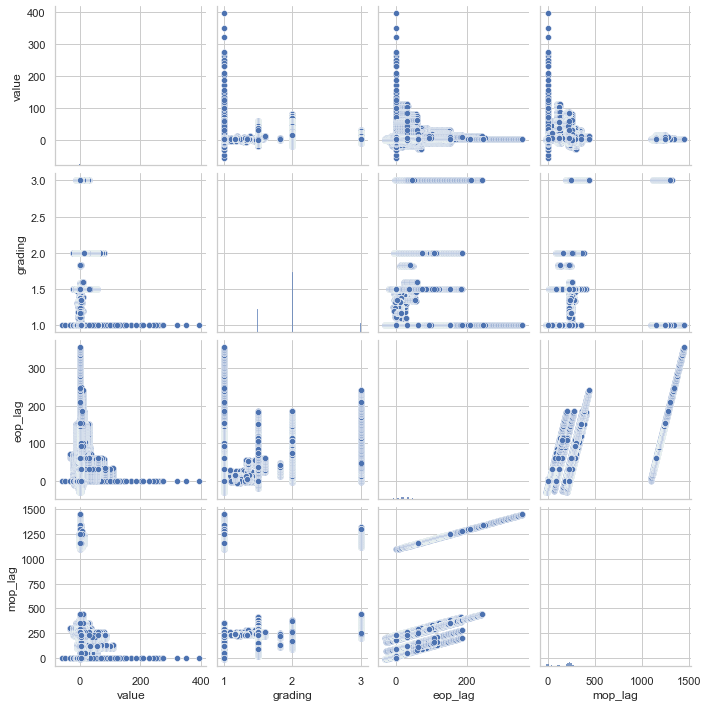

In [111]:
sns.pairplot(df[['value', 'grading','eop_lag', 'mop_lag']])
plt.show()

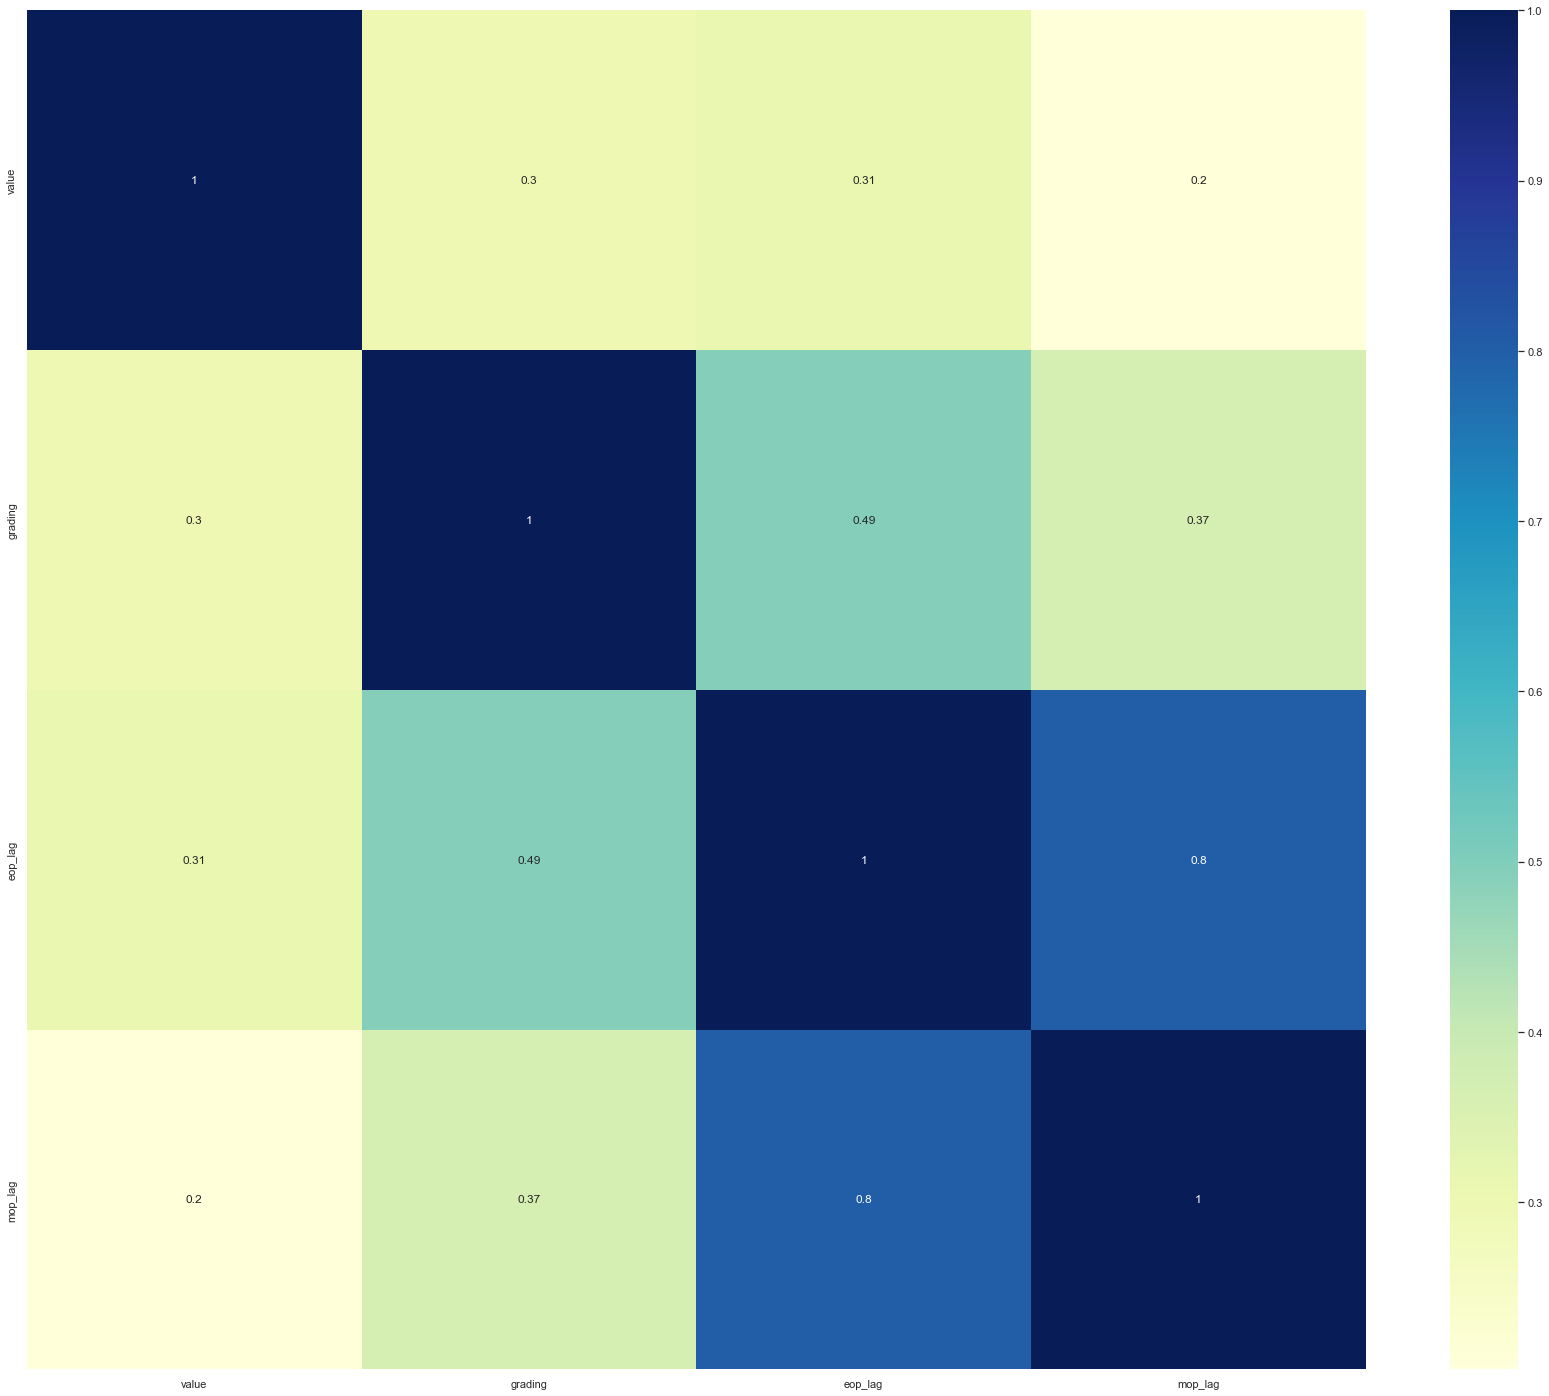

In [112]:
plt.figure(figsize = (30, 25))
sns.heatmap(df[['value', 'grading','eop_lag', 'mop_lag']].corr(), annot = True, cmap="YlGnBu")
plt.show()

<h1>Análisis exploratorio de datos</h1>

Resulta útil añadir una columna de teletipo como una concatenación de cid y xcat. Esto acorta el código para referencias a series temporales individuales.

In [113]:
df['ticker'] = df['cid'] + "_" + df["xcat"]
df["real_date"] =pd.to_datetime(df["real_date"])

Un histograma ofrece una representación simplificada de la distribución empírica pasada, mostrando el tamaño de los contenedores que abarcan ciertos rangos de valores en lugar de los valores individuales. En Seaborn, la función sns.histplot() nos permite realizar esta gráfica. Además, incluye una opción para superponer una estimación de densidad del núcleo, la cual se puede habilitar configurando el argumento kde en "True".

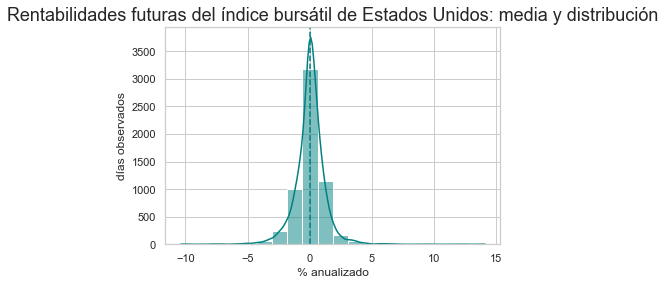

In [114]:
dfw = df.pivot_table(index='real_date', columns='ticker', values='value').replace(0, np.nan)  # llevar df a formato ancho
var = 'USD_EQXR_NSA'  # indicador especificado para analizar

col='teal'
sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)})  #  elige la apariencia
sns.histplot(x = var, data=dfw, bins=20, kde=True, color=col)  # histograma con número de contenedor personalizado y superposición de kde
plt.axvline(x= np.mean(dfw[var]), color=col, linestyle='--')  # añadir línea vertical para la media

plt.title('Rentabilidades futuras del índice bursátil de Estados Unidos: media y distribución', fontsize=18)
plt.xlabel('% anualizado', fontsize=12)
plt.ylabel('días observados', fontsize=12)
plt.show()


El histograma de rentabilidades futuras del índice bursátil de Estados Unidos representa la distribución de las tasas de rendimiento esperadas dentro del período de estudio (3 de enero de 2000 hasta el 31 de agosto de 2023). La media de esta distribución representa el rendimiento promedio esperado, es decir, el promedio de todas las tasas de rendimiento calculadas entre días observados en el conjunto de datos históricos.

Además, el histograma también proporciona información sobre la dispersión de las tasas de rendimiento. Esto se representa visualmente mediante la forma y la dispersión de las barras en el histograma. Una distribución más ancha indica una mayor variabilidad en las tasas de rendimiento, mientras que una distribución más estrecha indica una variabilidad más baja.

Si comparamos la gráfica previa (Dólar americano) con la siguiente gráfica (Euro), podemos notar que la distribución del euro indica una mayor variabilidad en las tasas de rendimiento en comparación con el dólar.

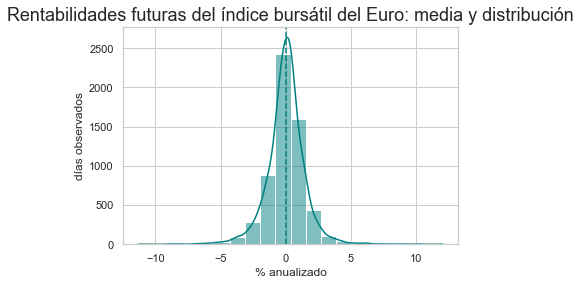

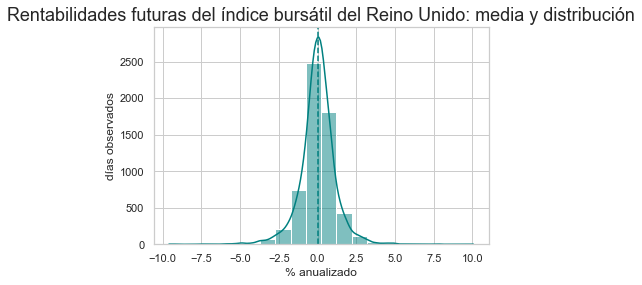

In [115]:
var = 'EUR_EQXR_NSA'  # indicador especificado para analizar

col='teal'
sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)})  #  elige la apariencia
sns.histplot(x = var, data=dfw, bins=20, kde=True, color=col)  # histograma con número de contenedor personalizado y superposición de kde
plt.axvline(x= np.mean(dfw[var]), color=col, linestyle='--')  # añadir línea vertical para la media

plt.title('Rentabilidades futuras del índice bursátil del Euro: media y distribución', fontsize=18)
plt.xlabel('% anualizado', fontsize=12)
plt.ylabel('días observados', fontsize=12)
plt.show()

var = 'GBP_EQXR_NSA'  # indicador especificado para analizar

col='teal'
sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)})  #  elige la apariencia
sns.histplot(x = var, data=dfw, bins=20, kde=True, color=col)  # histograma con número de contenedor personalizado y superposición de kde
plt.axvline(x= np.mean(dfw[var]), color=col, linestyle='--')  # añadir línea vertical para la media

plt.title('Rentabilidades futuras del índice bursátil del Reino Unido: media y distribución', fontsize=18)
plt.xlabel('% anualizado', fontsize=12)
plt.ylabel('días observados', fontsize=12)
plt.show()

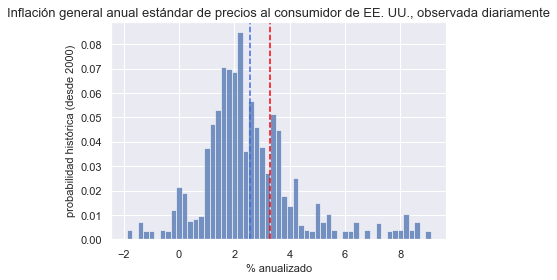

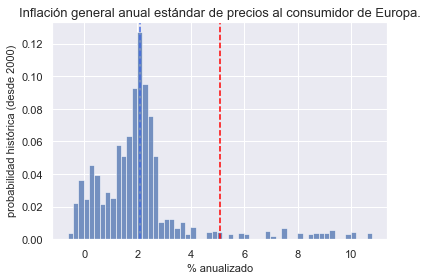

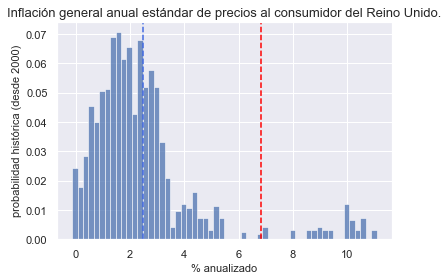

In [116]:
var = 'USD_CPIH_SA_P1M1ML12'  # indicador especificado para analizar

col='royalblue'
sns.set_theme(style='darkgrid', rc={'figure.figsize':(6, 4)})  
sns.histplot(x = var, data=dfw, binwidth=0.2, stat = 'probability') #histograma de probabilidad y ancho de contenedor preestablecidas
plt.axvline(x= np.mean(dfw[var]), color=col, linestyle='--')  #añadir línea vertical para la media
plt.axvline(x= dfw[var].dropna().iloc[-1], color='red', linestyle='--')

plt.title('Inflación general anual estándar de precios al consumidor de EE. UU., observada diariamente', fontsize=13)
plt.xlabel('% anualizado', fontsize=11)
plt.ylabel('probabilidad histórica (desde 2000)', fontsize=11) 
plt.show()

var = 'EUR_CPIH_SA_P1M1ML12'  # indicador especificado para analizar

col='royalblue'
sns.set_theme(style='darkgrid', rc={'figure.figsize':(6, 4)}) 
sns.histplot(x = var, data=dfw, binwidth=0.2, stat = 'probability')  #histograma de probabilidad y ancho de contenedor preestablecidas
plt.axvline(x= np.mean(dfw[var]), color=col, linestyle='--')  #añadir línea vertical para la media
plt.axvline(x= dfw[var].dropna().iloc[-1], color='red', linestyle='--')  

plt.title('Inflación general anual estándar de precios al consumidor de Europa.', fontsize=13)
plt.xlabel('% anualizado', fontsize=11)
plt.ylabel('probabilidad histórica (desde 2000)', fontsize=11)
plt.show()

var = 'GBP_CPIH_SA_P1M1ML12'  # indicador especificado para analizar

col='royalblue'
sns.set_theme(style='darkgrid', rc={'figure.figsize':(6, 4)}) 
sns.histplot(x = var, data=dfw, binwidth=0.2, stat = 'probability')  #histograma de probabilidad y ancho de contenedor preestablecidas
plt.axvline(x= np.mean(dfw[var]), color=col, linestyle='--')  #añadir línea vertical para la media
plt.axvline(x= dfw[var].dropna().iloc[-1], color='red', linestyle='--')  

plt.title('Inflación general anual estándar de precios al consumidor del Reino Unido.', fontsize=13)
plt.xlabel('% anualizado', fontsize=11)
plt.ylabel('probabilidad histórica (desde 2000)', fontsize=11)
plt.show()

El gráfico de inflación anual de precios al consumidor muestra la variación porcentual de los precios de los bienes y servicios durante el periodo de estudio. En el eje vertical se representa la probabilidad historica desde el 2000, mientras que en el eje horizontal se muestran los porcentajes anualizados.

Este tipo de gráfico es útil para observar y analizar la evolución de la inflación a lo largo de los años, identificar tendencias a largo plazo y evaluar la estabilidad de los precios en una economía determinada. También puede ayudar a los responsables de la formulación de políticas y a los inversores a tomar decisiones informadas sobre cuestiones económicas y financieras.

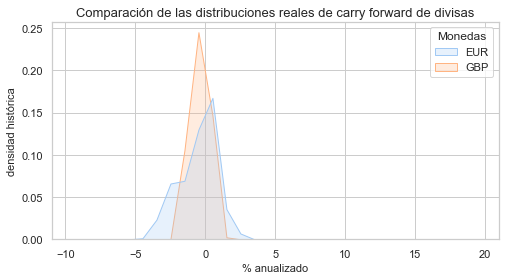

In [117]:
cids_sel = ['EUR', 'GBP'] # seleccionar un pequeño grupo de secciones transversales
filt1 = df['xcat'] == 'FXCRR_NSA'  # elegir (filtrar) categoría
filt2 = df['cid'].isin(cids_sel)  # elegir secciones transversales
filt3 = df['real_date'] >= pd.to_datetime('2010-01-01')  # establecer fecha de inicio
dfx = df[filt1 & filt2 & filt3][['value', 'cid']].replace(0, np.nan)

colors = 'pastel'  # choose color palette
sns.set_theme(style='whitegrid', rc={'figure.figsize':(8, 4)})
ax = sns.histplot(x='value', data=dfx,  
             hue='cid', element='poly', multiple='layer', 
             binrange=(-10, 20), binwidth = 1, stat='density', palette=colors)
plt.title('Comparación de las distribuciones reales de carry forward de divisas', fontsize=13)
plt.xlabel('% anualizado', fontsize=11)  
plt.ylabel('densidad histórica', fontsize=11)
leg = ax.axes.get_legend()
leg.set_title('Monedas')
plt.show()

La gráfica de comparación de las distribuciones reales de carry forward de divisas muestra la distribución de los retornos de las operaciones de carry forward en el mercado de divisas. Este tipo de gráfico compara dos o más distribuciones de rendimientos reales de carry forward de diferentes divisas. En el eje horizontal del gráfico se representan los retornos de carry forward. El eje vertical muestra la frecuencia o la densidad de probabilidad de los retornos en cada intervalo.

La figura permite visualizar la forma y la dispersión de los rendimientos de carry forward para las divisas del Euro y la Libra Esterila, que es útil para los inversores y analistas financieros que desean comparar el rendimiento de diferentes operaciones de carry forward.

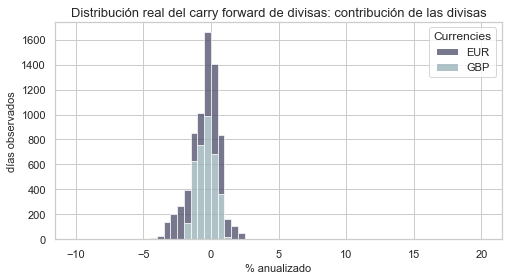

In [118]:
colors = 'bone'
sns.set_theme(style='whitegrid', rc={'figure.figsize':(8, 4)})
ax = sns.histplot(x='value', data=dfx,  
             hue='cid', element='bars', multiple='stack', 
             binrange=(-10, 20), binwidth = 0.5, stat='count', palette=colors)

plt.title('Distribución real del carry forward de divisas: contribución de las divisas', fontsize=13)
plt.xlabel('% anualizado', fontsize=11)  # set x-axis label
plt.ylabel('días observados', fontsize=11)  # set y-axis label
leg = ax.axes.get_legend()  # add legend box to plot to identify cross-sections
leg.set_title('Currencies')  # give title to legend box
plt.show()

En la gráfica de Distribución Real del Carry Forward de Divisas: Contribución de las Divisas se muestra cómo se distribuyen los rendimientos reales del carry forward en el mercado de divisas, desglosados por las dos monedas del estudio. Cada moneda participante en las operaciones de carry forward se representa en el eje horizontal, mientras que en el eje vertical se muestra la densidad de probabilidad o la frecuencia de los rendimientos asociados a cada una de esas monedas.

El gráfico nos permite comprender la composición de los rendimientos del carry forward y para identificar qué monedas tienen el mayor impacto en la distribución total de rendimientos. En esta podemos observar que ambas tienen impacto similares en la distribución de rendimientos.

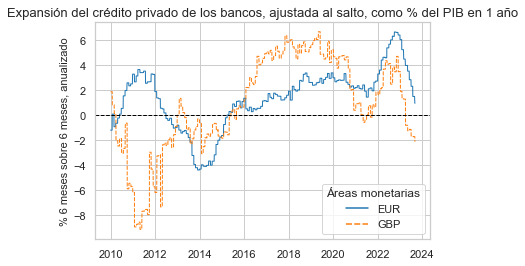

In [120]:
cids_sel = ['EUR', 'GBP']
filt1 = df['xcat'] == 'PCREDITGDP_SJA_D1M1ML12'
filt2 = df['cid'].isin(cids_sel)  # elegir secciones transversales
filt3 = df['real_date'] >= pd.to_datetime('2010-01-01')  # establecer fecha de inicio
dfx = df[filt1 & filt2 & filt3]
dfw = dfx.pivot(index=['real_date'], columns='cid', values='value')  # pivotar el marco de datos a la escala de tiempo común

colors='tab10'
sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)})
ax = sns.lineplot(data=dfw, estimator=None, palette=colors, linewidth=1) 

plt.axhline(y=0, color='black', linestyle='--', lw=1)
plt.title('Expansión del crédito privado de los bancos, ajustada al salto, como % del PIB en 1 año', fontsize=13) 
plt.xlabel('')  # set x-axis label
plt.ylabel('% 6 meses sobre 6 meses, anualizado', fontsize=11) 

leg = ax.axes.get_legend() 
leg.set_title('Áreas monetarias')  

plt.show()

La gráfica de expansión del crédito privado de los bancos muestra cómo varía la extensión del crédito otorgado por los bancos al sector privado en relación con el tamaño de la economía durante el tiempo de estudio para las divisas del Euro y la Libra esterlina. El eje horizontal representa el tiempo, el eje vertical muestra el porcentaje del PIB que representa la expansión del crédito privado ajustada al salto.

La expansión del crédito privado se refiere al cambio en el volumen total de crédito otorgado por los bancos al sector privado. Este cambio se ajusta al salto, lo que significa que se tienen en cuenta factores como las fluctuaciones estacionales o los eventos únicos que podrían distorsionar la tendencia general de la expansión del crédito.

Al representar esta expansión del crédito como porcentaje del PIB, podemos entender mejor su magnitud en relación con el tamaño total de la economía. Esto proporciona una perspectiva útil sobre el grado en que el crédito privado está impulsando el crecimiento económico o representando un riesgo potencial para la estabilidad financiera.

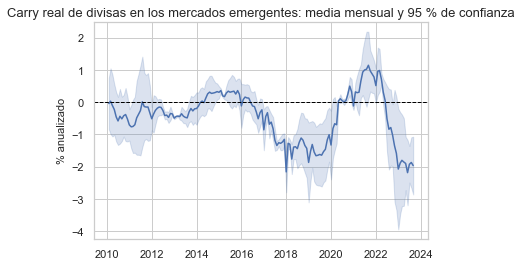

In [124]:
cids_sel = ['EUR', 'GBP']
filt1 = df['xcat'] == 'FXCRR_NSA'
filt2 = df['cid'].isin(cids_sel)  # elegir secciones transversales
filt3 = df['real_date'] >= pd.to_datetime('2010-01-01')  # establecer fecha de inicio

dfx = df[filt1 & filt2 & filt3]
dfm = dfx.groupby(['cid', 'xcat']).resample('M', on='real_date').mean()['value'].reset_index()  # convertir a promedios mensuales
dfw = dfm.pivot(index=['cid', 'real_date'], columns='xcat', values='value').reset_index()  # pivotar al índice apropiado

colors='Paired'
sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)})
sns.lineplot(data=dfw, x='real_date', y='FXCRR_NSA', estimator='mean', errorbar=('ci', 95))  #trazar la media y su intervalo de confianza del 95%

plt.axhline(y=0, color='black', linestyle='--', lw=1)
plt.title('Carry real de divisas en los mercados emergentes: media mensual y 95 % de confianza', fontsize=13)
plt.xlabel('')  # set x-axis label
plt.ylabel('% anualizado', fontsize=11)  # set y-axis label

plt.show()

La gráfica de Carry Real de Divisas en los Mercados Emergentes, con la media mensual y un intervalo de confianza del 95%, muestra cómo varían los retornos reales de las estrategias de carry en los mercados emergentes a lo largo del tiempo, junto con una medida de la incertidumbre asociada con esas estimaciones. El eje horizontal representa el tiempo y el eje vertical muestra los retornos reales de las estrategias de carry en los dos mercados de estudio.

La línea o las barras representan la media mensual de los retornos reales de carry y el intervalo de confianza del 95% se muestra como una banda alrededor de la media, lo que indica la variabilidad en los retornos y proporciona una medida de la incertidumbre asociada con la estimación de la media.

Esta gráfica nos permite evaluar el rendimiento y la volatilidad de las estrategias de carry en los el mercado del Euro y la Libra esterlina, así como identificar las tendencias a lo largo del tiempo.

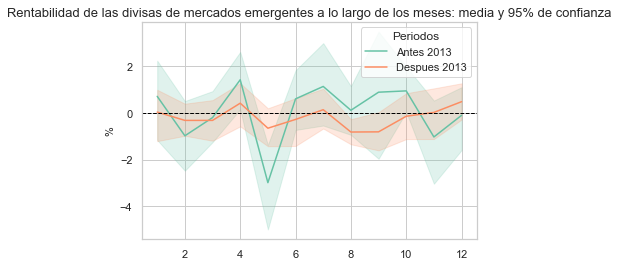

In [126]:

xcat_sel = 'FXXR_NSA'

filt1 = df['xcat'] == xcat_sel
filt2 = df['cid'].isin(cids_sel) 
filt3 = df['real_date'] >= pd.to_datetime('2010-01-01')  # establecer fecha de inicio
dfx = df[filt1 & filt2 & filt3]

dfm = dfx.groupby(['cid', 'xcat']).resample('M', on='real_date').sum()['value'].reset_index()  # medios mensuales
dfw = dfm.pivot(index=['cid', 'real_date'], columns='xcat', values='value').reset_index()
dfw['month'] = dfw['real_date'].dt.month
dfw['period'] = 'Antes 2013'
dfw.loc[dfw['real_date'].dt.year > 2013, 'period'] = 'Despues 2013'

colors='Set2' 
sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)}) 
ax = sns.lineplot(data=dfw, x='month', y=xcat_sel, hue='period', 
                  estimator='mean', errorbar=('ci', 95), palette=colors) 

plt.axhline(y=0, color='black', linestyle='--', lw=1) 
plt.title('Rentabilidad de las divisas de mercados emergentes a lo largo de los meses: media y 95% de confianza', fontsize=13) 
plt.xlabel('') 
plt.ylabel('%', fontsize=11) 
leg = ax.axes.get_legend() 
leg.set_title('Periodos')  

plt.show()

El gráfico de rentabilidad de las divisas de mercados emergentes a lo largo de los meses muestra cómo ha variado el rendimiento de las divisas de los mercados emergentes en relación con el tiempo, y cómo esta variación difiere entre dos períodos de tiempo específicos: antes y después de 2013. El eje horizontal representa los meses del año, mientras que el eje vertical muestra la rentabilidad de las divisas de los mercados emergentes. La rentabilidad se calcula como el cambio porcentual en el valor de la divisa durante un mes determinado.

El gráfico incluye dos líneaspara cada período de tiempo: una para la media de la rentabilidad mensual y otra para el intervalo de confianza del 95%. Este intervalo de confianza indica la variabilidad en los rendimientos y proporciona una medida de la incertidumbre asociada con las estimaciones de la media.

Comparar los períodos antes y después de 2013 permite visualizar si ha habido cambios significativos en la rentabilidad de las divisas de los mercados emergentes a lo largo del tiempo. Por ejemplo, podría revelar si hubo un cambio en la volatilidad o en la tendencia general de los rendimientos después de un evento particular en 2013.

Este tipo de gráfico es valioso para los inversores que desean comprender cómo ha evolucionado el rendimiento de las divisas de los mercados de estudio a lo largo del tiempo y si hay diferencias significativas entre los períodos específicados.

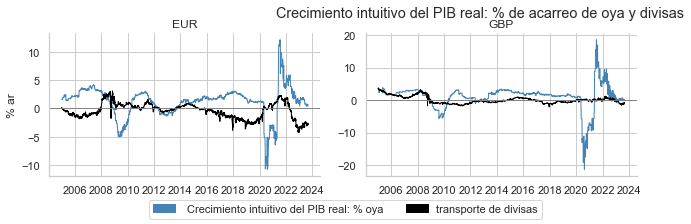

In [127]:
xcats_sel = ['INTRGDP_NSA_P1M1ML12_3MMA', 'FXCRR_NSA']
filt1 = df['xcat'].isin(xcats_sel)
filt2 = df['cid'].isin(cids_sel)
filt3 = df['real_date'] >= pd.to_datetime('2005-01-01')  
dfx = df[filt1 & filt2 & filt3]

colors=['steelblue', 'black']  
sns.set_theme(style='whitegrid', palette=colors) 
fg = sns.FacetGrid(dfx, col='cid', col_wrap=3, 
                   palette=colors, hue='xcat', hue_order=xcats_sel,  
                   height=3, aspect=1.5,  
                   sharey=False)  
fg.map_dataframe(sns.lineplot, x='real_date', y='value', errorbar=None, lw=1)  
fg.map(plt.axhline, y=0, c=".5", lw=0.75) 

fg.set_axis_labels('', '% ar')  
fg.set_titles(col_template='{col_name}')  
fg.fig.suptitle('Crecimiento intuitivo del PIB real: % de acarreo de oya y divisas', y=1)

name_to_color = {' Crecimiento intuitivo del PIB real: % oya': colors[0], 'transporte de divisas': colors[1]} 
patches = [mpl.patches.Patch(color=v, label=k) for k,v in name_to_color.items()] 
labels = name_to_color.keys() # series labels for legend box
fg.fig.legend(handles=patches, labels=labels, loc='lower center', ncol=2)

plt.show()

El gráfico de Crecimiento Intuitivo del PIB Real proporciona una representación visual del crecimiento económico ajustado por el efecto del tipo de cambio y la inflación. El eje horizontal representa el tiempo, mientras que el eje vertical muestra el crecimiento del Producto Interno Bruto (PIB) real, que refleja el crecimiento económico ajustado por la inflación. Las líneas en el gráfico representan dos medidas de crecimiento del PIB real: una medida utilizando el tipo de cambio de la moneda local  y otra medida utilizando el tipo de cambio de divisas (en relación al dólar estadounidense).

Al comparar estas dos medidas de crecimiento del PIB real, podemos evaluar cómo afecta el tipo de cambio a la percepción del crecimiento económico. Por ejemplo, si el crecimiento del PIB medido en moneda local es más alto que el medido en divisas, esto sugiere que el crecimiento económico se está sobreestimando debido a la depreciación de la moneda local. Por otro lado, si el crecimiento del PIB medido en divisas es más alto, esto sugiere que el crecimiento económico se está subestimando debido a la apreciación de la moneda local.

<h1>Modelo de Forecast</h1>

<h2>Modelos de regresión</h2>

Los modelos de regresión juegan un papel fundamental en las estrategias de inversión macro cuantitativa al permitir la evaluación y predicción de variables clave que afectan a los mercados financieros y a la economía en su conjunto. Estos modelos emplean técnicas estadísticas para analizar la relación entre múltiples variables independientes y una variable dependiente de interés, lo que proporciona una base sólida para la toma de decisiones en el ámbito de la inversión.

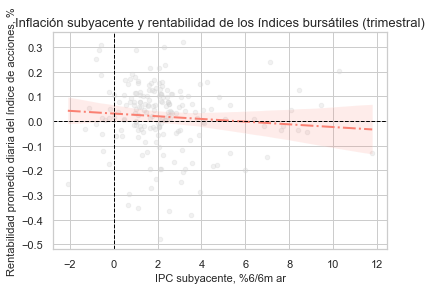

In [129]:
xcats_sel = ['CPIH_SJA_P3M3ML3AR', 'EQXR_NSA']
filt1 = df['xcat'].isin(xcats_sel)
filt2 = df['cid'].isin(cids_sel)
filt3 = df['real_date'] >= pd.to_datetime('2000-01-01')
dfx = df[filt1 & filt2 & filt3]
dff = dfx.groupby(['cid', 'xcat']).resample('Q', on='real_date').mean()['value'].reset_index()
dfw = dff.pivot(index=['cid', 'real_date'], columns='xcat', values='value').reset_index()

sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)}) 
sns.regplot(x=xcats_sel[0], y=xcats_sel[1], data=dfw, ci=98, order=1, 
            robust=False,  
            scatter_kws={'s': 20, 'alpha': 0.3, 'color':'lightgray'},
            line_kws={'lw' : 2, 'linestyle': '-.', 'color': 'salmon'}) 

plt.axhline(y=0, color='black', linestyle='--', lw=1) 
plt.axvline(x=0, color='black', linestyle='--', lw=1) 

plt.title('Inflación subyacente y rentabilidad de los índices bursátiles (trimestral)', fontsize=13)
plt.xlabel('IPC subyacente, %6/6m ar', fontsize=11)
plt.ylabel('Rentabilidad promedio diaria del índice de acciones, %', fontsize=11)

plt.show()

La gráfica que muestra la relación entre la inflación subyacente y la rentabilidad de los índices bursátiles de manera trimestral, utilizando un diagrama de dispersión con una línea de regresión ajustada, muestra cómo la inflación influye en los rendimientos del mercado de valores en el transcurso del tiempo. El eje horizontal representa la inflación subyacente, que es una medida de la inflación. El eje vertical muestra la rentabilidad de los índices bursátiles.

El gráfico también incluye una línea de regresión ajustada. La pendiente y la dirección de esta línea de regresión indican la naturaleza y la fuerza de la relación entre las dos variables: si la línea es ascendente, indica una relación positiva, mientras que una línea descendente indica una relación negativa.

Este tipo de gráfico nos permite identificar patrones de la relación entre la inflación y los rendimientos del mercado de valores.

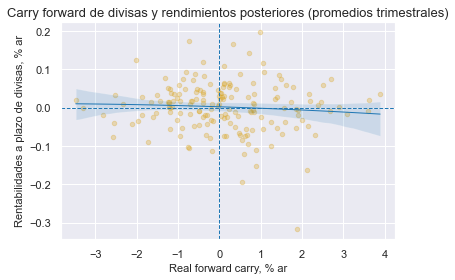

In [130]:

xcats_sel = ['FXCRR_NSA', 'FXXR_NSA']  
filt1 = df['xcat'].isin(xcats_sel)
dfx = df[filt1 & filt2 & filt3] 
dff = dfx.groupby(['cid', 'xcat']).resample('Q', on='real_date').mean()['value'].reset_index() 
filt4 = dff['xcat']==xcats_sel[0]
dff.loc[filt4, 'value'] = dff[filt4].groupby(['cid', 'xcat'])['value'].shift(1)
dfw = dff.pivot(index=['cid', 'real_date'], columns='xcat', values='value').reset_index()

sns.set_theme(style='darkgrid', rc={'figure.figsize':(6, 4)})
sns.regplot(x=xcats_sel[0], y=xcats_sel[1], data=dfw, ci=95,  
            order=2, 
            scatter_kws={'s': 20, 'alpha': 0.3, 'color':'goldenrod'}, 
            line_kws={'lw' : 1, 'linestyle': '-', 'color': 'tab:blue'}) 

plt.axhline(y=0, color='tab:blue', linestyle='--', lw=1)
plt.axvline(x=0, color='tab:blue', linestyle='--', lw=1)

plt.title('Carry forward de divisas y rendimientos posteriores (promedios trimestrales)', fontsize=13)
plt.xlabel('Real forward carry, % ar', fontsize=11)
plt.ylabel('Rentabilidades a plazo de divisas, % ar', fontsize=11)

plt.show()

La gráfica muestra la relación entre el carry forward de divisas y los rendimientos posteriores, utilizando promedios trimestrales y curvas de regresión polinomial con el argumento de orden, proporciona una representación visual de cómo el carry forward de divisas influye en los rendimientos futuros de manera trimestral, utilizando un modelo polinomial para ajustar la relación entre estas dos variables.

El eje horizontal representa el carry forward de divisas, que es una estrategia de inversión que implica pedir prestado en una divisa con una tasa de interés baja para invertir en otra con una tasa de interés más alta. El eje vertical muestra los rendimientos posteriores, que pueden expresarse como promedios trimestrales de rendimientos de inversiones realizadas después de llevar a cabo la estrategia de carry forward de divisas.

La gráfica incluye puntos dispersos que representan los pares de datos trimestrales: el carry forward de divisas y los rendimientos posteriores correspondientes. Estos puntos se distribuyen a lo largo del gráfico, y la forma en que se agrupan o dispersan proporciona información sobre la fuerza y la dirección de la relación entre estas dos variables.

El uso de curvas de regresión polinomial permite capturar relaciones no lineales y proporciona una representación más flexible de la relación entre el carry forward de divisas y los rendimientos posteriores, lo que puede ayudar a identificar patrones o tendencias más complejas en los datos.

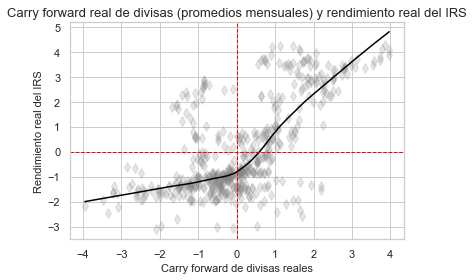

In [131]:

xcats_sel = ['FXCRR_NSA', 'RYLDIRS02Y_NSA']
filt1 = df['xcat'].isin(xcats_sel)

dfx = df[filt1 & filt2 & filt3]
dff = dfx.groupby(['cid', 'xcat']).resample('M', on='real_date').mean()['value'].reset_index()
dfw = dff.pivot(index=['cid', 'real_date'], columns='xcat', values='value').reset_index()

sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)})
sns.regplot(x=xcats_sel[0], y=xcats_sel[1], data=dfw, 
            lowess=True,  
            marker='d', 
            scatter_kws={'s': 50, 'alpha': 0.2, 'color':'gray'},
            line_kws={'lw' : 1.5, 'color': 'black'}) 

plt.axhline(y=0, color='red', linestyle='--', lw=1)
plt.axvline(x=0, color='red', linestyle='--', lw=1)

plt.title('Carry forward real de divisas (promedios mensuales) y rendimiento real del IRS', fontsize=13)
plt.xlabel('Carry forward de divisas reales', fontsize=11)
plt.ylabel('Rendimiento real del IRS', fontsize=11)

plt.show()

El gráfico representa la relación entre el carry forward real de divisas que es un indicador de la rentabilidad de las inversiones. Se utiliza un enfoque promedio mensual para calcular el carry forward y el rendimiento real del IRS, lo que permite capturar las tendencias a lo largo del tiempo de manera más detallada.

Para representar esta relación, se utilizan dos técnicas diferentes. Primero, se aplica un modelo logístico para variables binarias al rendimiento real del IRS. Esto implica convertir el rendimiento del IRS en una variable binaria que indica si se ha obtenido una ganancia o una pérdida en un determinado período. Luego, se utiliza el carry forward real de divisas como predictor para este modelo logístico, lo que permite evaluar cómo afecta esta estrategia de inversión a la probabilidad de obtener una ganancia o una pérdida en el rendimiento del IRS.

Además, se aplica lowess (regresión lineal ponderada localmente) al carry forward real de divisas y al rendimiento real del IRS. Esta técnica proporciona una representación suave y flexible de la relación entre estas dos variables, permitiendo capturar posibles relaciones no lineales y tendencias a corto plazo en los datos. La regresión lineal ponderada localmente ajusta una línea a los datos en cada punto, ponderando más los puntos cercanos y menos los puntos distantes, lo que permite una adaptación flexible a la forma de los datos sin imponer una estructura rígida.

<h2>Análisis de series temporales</h2>

El suavizado exponencial es una técnica valiosa para identificar tendencias en datos ruidosos y capturar los patrones subyacentes. Consiste en utilizar un promedio móvil que otorga pesos más altos a los valores más recientes y asigna pesos gradualmente decrecientes a los valores medidos más antiguos. El valor numérico del parámetro de suavizado, 𝛼, se establece entre 0 y 1 y controla la disminución de los pesos hacia el pasado. Un valor más pequeño (más cercano a 0) crea una línea más suave (cambios más lentos) similar a un promedio móvil con un gran número de períodos. Un valor alto para alfa sigue de cerca los datos al dar más peso a los datos recientes. Esto crea una línea más irregular porque los datos actuales tienen un peso más alto, lo que reduce el grado de promediado de los datos más antiguos. En el caso extremo de 𝛼 = 1, la serie temporal resultante es equivalente a la serie temporal real. La elección del parámetro de suavizado 𝛼 depende del equilibrio deseado entre la capacidad de respuesta a los datos recientes y el nivel de suavizado. En el ejemplo a continuación, elegimos 2 valores de 𝛼 para demostrar el efecto.

A diferencia de los promedios móviles con una ventana de estimación fija, el suavizado exponencial no corta la ventana de observación, por lo que la estimación se basa en ventanas en expansión. Sin embargo, en la práctica, la importancia de las observaciones anteriores disminuye exponencialmente, como en el ejemplo anterior con un valor de alfa de 0.13, donde la mitad de los pesos se utilizan solo para las últimas 5 observaciones (en datos diarios, días).

En el contexto del conjunto de datos que utilizamos, el suavizado exponencial puede ser utilizado como una estimación de valores esperados lentos o adaptativos, en lugar de tendencias. Los datos cuantamentales siempre registran el estado de la información más reciente del público con respecto a un concepto económico y financiero al final de un día dado.

Por lo tanto, los indicadores cuantamentales son representativos de un participante de mercado atento. Sin embargo, muchos agentes en la economía o incluso en los mercados pueden no actualizarse sobre los estados económicos diariamente. Por lo tanto, el estado promedio de la información pública o del mercado puede estar representado por un promedio móvil exponencial, donde la mitad del tiempo indica el tiempo transcurrido hasta que la mitad de la población se haya puesto al día con el estado de información más reciente.

Para correr los algoritmos del suavizado exponencial primero debemos cargar la libreria correspondiente en Python.


In [174]:
from statsmodels.tsa.api import SimpleExpSmoothing
import warnings

In [187]:
cids_sel = ['EUR', 'GBP']
xcat_sel = "INTRGDPv5Y_NSA_P1M1ML12_3MMA"

filt1 = df['xcat'] == xcat_sel
filt2 = df['cid'].isin(cids_sel) 
filt3 = df['real_date'] >= pd.to_datetime('2002-01-01')

dfx = df[filt1 & filt2 & filt3]


Nos interesa realizar tres ejemplos de suavizado exponencial simple.

En el primer ejemplo, ema003, no aplicamos ninguna optimización basada en datos, sino que proporcionamos al modelo el parámetro 𝛼 = 0.03. Esto implica un tiempo medio de alrededor de 23 días, lo que indica que el promedio móvil exponencial simula un mercado donde el 50% de los agentes han actualizado su percepción en los últimos 23 días, aproximadamente una vez al mes. Utilizando la fórmula mencionada, 𝜏 = -ln(2) / ln(1 - 𝛼) ≈ 22.8, lo que significa que las últimas 22.8 observaciones contienen la mitad de los pesos totales del promedio móvil.

En el segundo ejemplo, ema013, de manera similar, seleccionamos el decaimiento del peso por adelantado pero con 𝛼 = 0.13, lo que implica un tiempo medio de aproximadamente 5 días laborables (una semana).

En el tercer ejemplo, emaop, permitimos que statsmodels optimice el decaimiento del peso en función de los datos anteriores, minimizando la suma de los errores cuadrados de las predicciones a un día de anticipación. Para los estados de información de datos económicos, podría argumentarse que se debe aplicar primero una conversión de frecuencia antes de aplicar este método, para obtener la serie económica publicada en su frecuencia de actualización nativa en lugar de valores diarios. Sin embargo, por simplicidad, comenzamos aplicando el método a estados de información diaria.

En los ejemplos ema003 y ema013, el argumento "heurístico" se refiere a la elección de los valores iniciales; no se basa en un principio estadístico particular, sino que utiliza un enfoque razonable que se ha encontrado que funciona bien en la práctica.

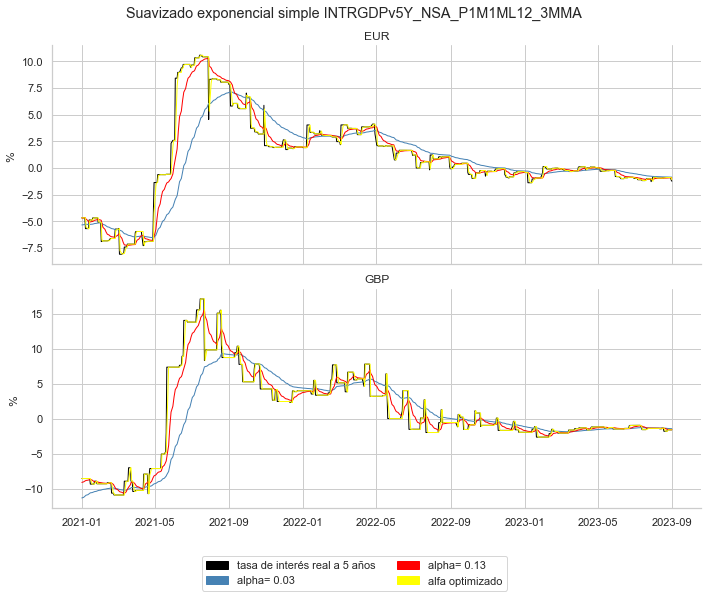

In [188]:
alpha_003 = 0.03
alpha_013 = 0.13

dfw = dfx.pivot_table(index="real_date", columns="cid", values="value").replace(
    0, np.nan
)  # amplia serie temporal df

dfema = pd.DataFrame(columns=["cid", "xcat", "real_date", "value"])

for cid in cids_sel:

    ema003 = SimpleExpSmoothing(
        dfw[cid].dropna(), initialization_method="heuristic"
    ).fit(smoothing_level=alpha_003, optimized=False)

    ema013 = SimpleExpSmoothing(
        dfw[cid].dropna(), initialization_method="heuristic"
    ).fit(smoothing_level=alpha_013, optimized=False)

    emaop = SimpleExpSmoothing(
        dfw[cid].dropna(), initialization_method="estimated"
    ).fit()

    df003 = ema003.fittedvalues.to_frame().reset_index().rename(columns={0: "value"})
    df003["xcat"] = xcat_sel + "_EMA003"

    df013 = ema013.fittedvalues.to_frame().reset_index().rename(columns={0: "value"})
    df013["xcat"] = xcat_sel + "_EMA013"

    dfop = emaop.fittedvalues.to_frame().reset_index().rename(columns={0: "value"})
    dfop["xcat"] = xcat_sel + "_EMAOP"
    Opt_alpha = emaop.params["smoothing_level"].round(4)

    dfc = pd.concat([df003, df013, dfop])

    dfc["cid"] = cid
    dfc = dfc[list(dfema.columns)]
    dfema = dfema.append(dfc)


dfx["xcat"] = xcat_sel
dfema = dfema.append(dfx[list(dfema.columns)])

dfemx = dfema[dfema["real_date"] >= pd.to_datetime("2021-01-01")]

xcats_ema = [xcat_sel + x for x in ["", "_EMA003", "_EMA013", "_EMAOP"]]
colors = ["black", "steelblue", "red", "yellow"]


sns.set_theme(style="whitegrid", palette=colors)
fg = sns.FacetGrid(
    dfemx,
    col="cid",
    col_wrap=1,
    palette=colors,
    hue="xcat",
    hue_order=xcats_ema,
    height=4,
    aspect=2.5, 
    sharey=False,
) 

fg.map_dataframe(
    sns.lineplot, x="real_date", y="value", errorbar=None, lw=1
) 

fg.set_axis_labels("", "% ")  
fg.set_titles(col_template="{col_name}") 
fg.fig.suptitle(
    f"Suavizado exponencial simple {xcat_sel}", y=1.02
)  

name_to_color = {
    "tasa de interés real a 5 años": colors[0],
    f"alpha= {alpha_003}": colors[1],
    f"alpha= {alpha_013}": colors[2],
    "alfa optimizado": colors[3],
}

patches = [
    mpl.patches.Patch(color=v, label=k) for k, v in name_to_color.items()
] 
labels = name_to_color.keys()  
fg.fig.legend(
    handles=patches, labels=labels, loc="lower center", ncol=2
)  

fg.fig.subplots_adjust(bottom=0.15) 
plt.show()

La serie temporal de los valores de alfa seleccionados es apropiada para realizar pruebas retrospectivas y suaviza claramente los datos originales, eliminando el ruido. Sin embargo, los promedios móviles exponenciales optimizados calculan los valores suavizados pasados en función de la información FUTURA. Estas series temporales no representan estados de información y, por lo tanto, no son adecuadas para realizar pruebas retrospectivas.

La forma correcta de calcular los promedios móviles exponenciales optimizados es reestimar secuencialmente el factor de suavizado y calcular el indicador promediado en cada momento utilizando el parámetro que era óptimo en ese momento. Esto equivale al uso de series temporales de promedios móviles exponencialmente suavizadas.

Un enfoque más realista en muchos casos sería ejecutar la estimación suavizada para un marco de datos diario, utilizando fechas de fin de mes para estimar el valor óptimo de 𝛼. Luego, aplicamos este valor optimizado de alfa a una serie temporal correspondiente al final del próximo mes.

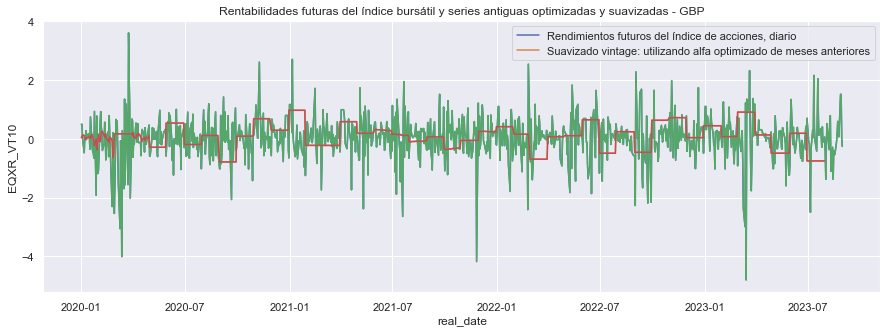

In [190]:
filt1 = df["xcat"] == "EQXR_VT10"
filt2 = df["cid"] == "GBP"
dfx = (
    df[filt1 & filt2].loc[:, ["real_date", "value"]].dropna().set_index("real_date")
).rename(
    columns={"value": "EQXR_VT10"}
)  # serie temporal df
dfx.index = pd.to_datetime(dfx.index)
dfx = dfx[pd.Timestamp("2020-01-01") :]


np.diff(np.array(dfx.index.month))

month_end = list(np.diff(np.array(dfx.index.month)) != 0) + [True]

# contar cuántos fines de mes tenemos en el marco de datos diario
count_month_end = sum(month_end)
dfxo = dfx.copy().replace(to_replace=0, method="bfill")

# 1. definir el período de tiempo diario inicial hasta el final del segundo mes completo
dfema = dfx.loc[
    : dfx.loc[
        month_end,
    ].index[1]
]

# 2. aplicar suavizado de exp simple optimizado al período de tiempo inicial
emaop = SimpleExpSmoothing(dfema.dropna(), initialization_method="estimated").fit()
Opt_alpha = emaop.params["smoothing_level"]

# 3. rellenar el marco de datos del marcador de posición con nuevos valores
dfxo["smoothened_value"] = emaop.fittedvalues.to_frame()

# 4. Aplicar una lógica similar al resto de la serie de datos mediante un bucle.:


for i in range(1, count_month_end - 1):
    dfema1 = dfxo["EQXR_VT10"].loc[
        dfx.loc[
            month_end,
        ]
        .index[i - 1] : dfx.loc[
            month_end,
        ]
        .index[i]
    ]

    emaop1 = SimpleExpSmoothing(dfema1, initialization_method="heuristic").fit(
        smoothing_level=Opt_alpha, optimized=False
    )

    dfop1 = emaop1.fittedvalues.to_frame()

    dfxo.loc[dfxo.index.isin(dfop1.index), ["smoothened_value"]] = dfop1[[0]].values

    dfema2 = dfxo["EQXR_VT10"].loc[
        : dfx.loc[
            month_end,
        ].index[i - 1]
    ]

    emaop1 = SimpleExpSmoothing(dfema2, initialization_method="estimated").fit()
    Opt_alpha = emaop1.params["smoothing_level"]


sns.set(rc={"figure.figsize": (15, 5)})

fig, ax = plt.subplots(figsize=(15, 5))

sns.lineplot(
    data=dfxo,
    x="real_date",
    y="EQXR_VT10",
    label="Rendimientos futuros del índice de acciones, diario",
    ax=ax,
)
sns.lineplot(
    data=dfxo,
    x="real_date",
    y="smoothened_value",
    label="Suavizado vintage: utilizando alfa optimizado de meses anteriores",
    ax=ax,
)
plt.title("Rentabilidades futuras del índice bursátil y series antiguas optimizadas y suavizadas - GBP")

plt.plot(dfxo)

warnings.filterwarnings('ignore')

Para generar el gráfico anterior, añadimos la sección correspondiente al mes siguiente, donde nuevamente estimamos nuevos valores óptimos de 𝛼 y los aplicamos a los datos diarios del siguiente mes. Esta gráfica representa las Rentabilidades futuras del índice bursátil y las series antiguas optimizadas y suavizadas para la Libra Esterlina.

La razón de las líneas planas en el gráfico se debe a que el suavizado exponencial simple tiene una función de pronóstico "plana". Por lo tanto, todos los pronósticos toman el mismo valor, igual al componente del último nivel.

Repetimos el codigo para visualizar as Rentabilidades futuras del índice bursátil y las series antiguas optimizadas y suavizadas para el Euro.

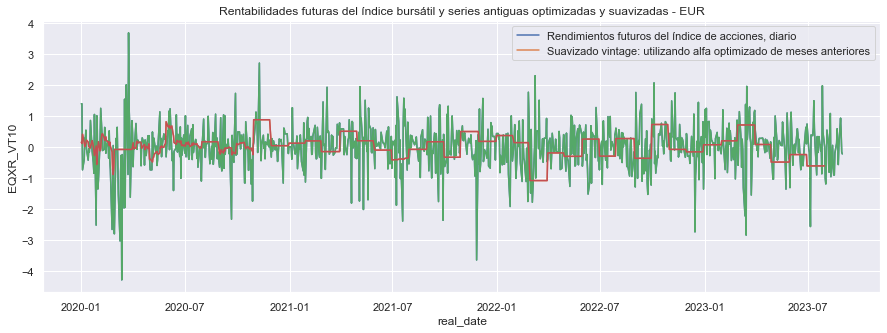

In [191]:
filt1 = df["xcat"] == "EQXR_VT10"
filt2 = df["cid"] == "EUR"
dfx = (
    df[filt1 & filt2].loc[:, ["real_date", "value"]].dropna().set_index("real_date")
).rename(
    columns={"value": "EQXR_VT10"}
)  # serie temporal df
dfx.index = pd.to_datetime(dfx.index)
dfx = dfx[pd.Timestamp("2020-01-01") :]


np.diff(np.array(dfx.index.month))

month_end = list(np.diff(np.array(dfx.index.month)) != 0) + [True]

# contar cuántos fines de mes tenemos en el marco de datos diario
count_month_end = sum(month_end)
dfxo = dfx.copy().replace(to_replace=0, method="bfill")

# 1. definir el período de tiempo diario inicial hasta el final del segundo mes completo
dfema = dfx.loc[
    : dfx.loc[
        month_end,
    ].index[1]
]

# 2. aplicar suavizado de exp simple optimizado al período de tiempo inicial
emaop = SimpleExpSmoothing(dfema.dropna(), initialization_method="estimated").fit()
Opt_alpha = emaop.params["smoothing_level"]

# 3. rellenar el marco de datos del marcador de posición con nuevos valores
dfxo["smoothened_value"] = emaop.fittedvalues.to_frame()

# 4. Aplicar una lógica similar al resto de la serie de datos mediante un bucle.:


for i in range(1, count_month_end - 1):
    dfema1 = dfxo["EQXR_VT10"].loc[
        dfx.loc[
            month_end,
        ]
        .index[i - 1] : dfx.loc[
            month_end,
        ]
        .index[i]
    ]

    emaop1 = SimpleExpSmoothing(dfema1, initialization_method="heuristic").fit(
        smoothing_level=Opt_alpha, optimized=False
    )

    dfop1 = emaop1.fittedvalues.to_frame()

    dfxo.loc[dfxo.index.isin(dfop1.index), ["smoothened_value"]] = dfop1[[0]].values

    dfema2 = dfxo["EQXR_VT10"].loc[
        : dfx.loc[
            month_end,
        ].index[i - 1]
    ]

    emaop1 = SimpleExpSmoothing(dfema2, initialization_method="estimated").fit()
    Opt_alpha = emaop1.params["smoothing_level"]


sns.set(rc={"figure.figsize": (15, 5)})

fig, ax = plt.subplots(figsize=(15, 5))

sns.lineplot(
    data=dfxo,
    x="real_date",
    y="EQXR_VT10",
    label="Rendimientos futuros del índice de acciones, diario",
    ax=ax,
)
sns.lineplot(
    data=dfxo,
    x="real_date",
    y="smoothened_value",
    label="Suavizado vintage: utilizando alfa optimizado de meses anteriores",
    ax=ax,
)
plt.title("Rentabilidades futuras del índice bursátil y series antiguas optimizadas y suavizadas - EUR")

plt.plot(dfxo)

warnings.filterwarnings('ignore')

<h1>Conclusión</h1>

Las estrategias de inversión macro cuantitativa se basan en el análisis exhaustivo de datos macroeconómicos y financieros para tomar decisiones informadas en el mercado. Estas estrategias emplean modelos matemáticos y algoritmos para identificar patrones y oportunidades en los mercados financieros, centrándose en factores como tasas de interés, inflación, políticas gubernamentales y otros indicadores económicos.

Históricamente, los datos cuantitativos han presentado desafíos significativos, incluida la falta de estandarización y la presencia de errores y omisiones. Sin embargo, con el uso de distintas técnicas estadísticas, es posible analizar y comprender las relaciones entre múltiples variables macroeconómicas a lo largo del tiempo.

En nuestros análisis, nos concentramos en la aplicación de diversos modelos de forecasting a conjuntos de datos macro-cuantitativos. Estos conjuntos de datos abarcan una amplia gama de indicadores económicos clave, lo que nos permite comprender mejor las interconexiones y relaciones globales que influyen en los mercados financieros.

Por ejemplo, al aplicar el suavizado exponencial, podemos identificar tendencias en los datos y suavizar el ruido, lo que nos permite realizar pronósticos más precisos. A través de ejemplos como ema003 y ema013, exploramos diferentes enfoques para el suavizado exponencial, desde la selección de parámetros fijos hasta la optimización basada en datos.

Es importante tener en cuenta que el uso de series temporales optimizadas para el suavizado exponencial implica reestimar secuencialmente los parámetros y aplicarlos a datos futuros, lo que nos permite obtener pronósticos más precisos y adaptativos.

En resumen, al combinar el análisis detallado de datos macro-cuantitativos con técnicas de modelado avanzadas, podemos tomar decisiones de inversión más informadas y aprovechar las oportunidades en los mercados financieros globales.

<h1>Referencia</h1>

JPMAQS Quantamental Indicators. (2023, December 14). <a href='https://www.kaggle.com/datasets/macrosynergy/fixed-income-returns-and-macro-trends'>Kaggle</a>.

Simple exponential smoothing | Forecasting: Principles and Practice (2nd ed). (n.d.). https://otexts.com/fpp2/ses.html